# Kunal Verma

# TASK-3: Perform an EDA on the Superstore dataset to find out the areas to make profit

In [1]:
# import the libraries and suppress the warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the file
df=pd.read_csv(r'C:\Users\hp\Downloads\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


- Clearly, not a single observation is missing in the dataset. So, we can carry on with the analysis.

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df_num=numeric_data = df.select_dtypes(exclude='object')
df_num

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028
9990,92627,91.9600,2,0.00,15.6332
9991,92627,258.5760,2,0.20,19.3932
9992,92627,29.6000,4,0.00,13.3200


- Here 'Postal Code' is insignificant for our analysis. So it can be dropped from the dataset.

In [6]:
# Dropping insignificant variable
df_num=df_num.drop('Postal Code',axis=1)
df_num.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [7]:
df_cate=df.select_dtypes(include='object')
df_cate

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper


- Since the entire dataset is from the USA, so having the country column becomes pointless.

In [8]:
# Dropping 'Country' column
df_cate=df_cate.drop('Country',axis=1)
df_cate.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage


# Univariate Analysis

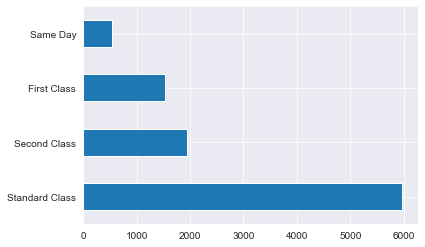

In [9]:
sns.set_style("darkgrid")
df_cate['Ship Mode'].value_counts().plot.barh()

- Standard Class shipping mode is the most preferred one.

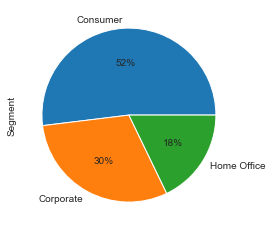

In [10]:
df_cate['Segment'].value_counts().plot.pie(autopct='%1.0f%%')

- Majority(52%) customers are the household consumers. 

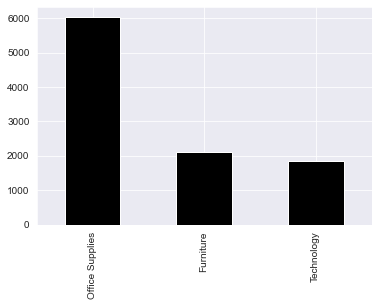

In [11]:
sns.set_style("darkgrid")

df_cate['Category'].value_counts().plot.bar(color='Black')

- Around 6000 out of the 9994 items are Office Supplies.

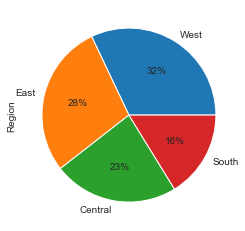

In [12]:
plt.figure(figsize=(6,4))
df_cate['Region'].value_counts().plot.pie(autopct='%1.0f%%')

- Customers belonging to the West US are contributing the most to the sale of the store.

In [13]:
df_num.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [14]:
df_cate.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')

# Bivariate Analysis

The variable for our study interest is Profit.

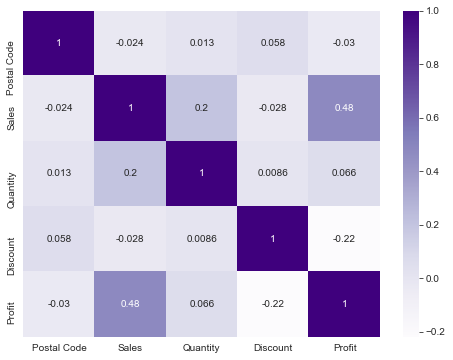

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='Purples')

- As is visible and obvious, high Sales is favorable for making profits while a high discount is not healthy for the business.

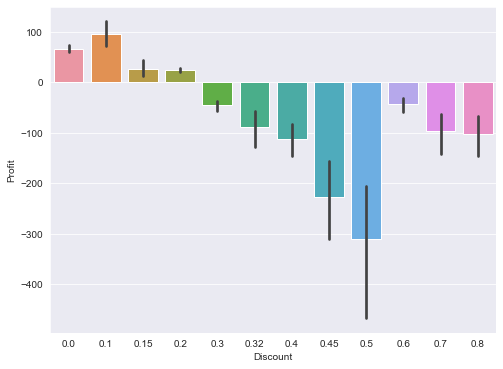

In [16]:
# Analysing the effects of various variables on the Profit
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.barplot(df_num.Discount,df_num.Profit)

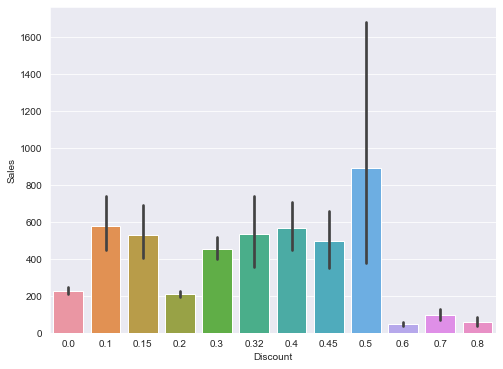

In [17]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.barplot(df_num.Discount,df_num.Sales)

- As we can witness any discount above 20% though increases the sales, but leads to an overall loss to the store. 

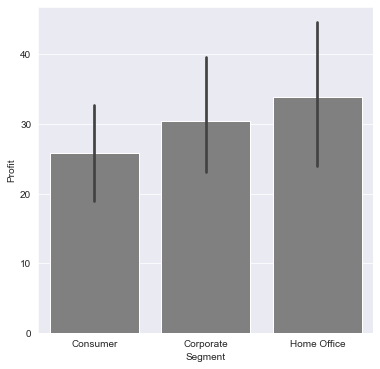

In [18]:
plt.figure(figsize=(6,6))
sns.set_style("darkgrid")
sns.barplot(df_cate.Segment,df_num.Profit,color='Grey')

- Home Office is the high-value customer segment as it is contributing the most to the profit of the business.

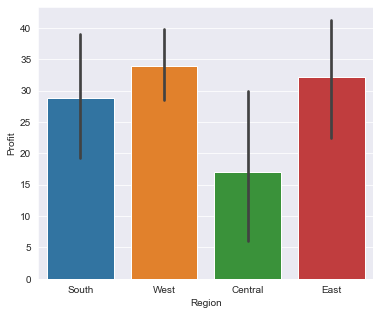

In [19]:
plt.figure(figsize=(6,5))
sns.set_style("darkgrid")
sns.barplot(df_cate.Region,df_num.Profit)

- West and East region customers are the highest buying customers and also the main profit yeilders.

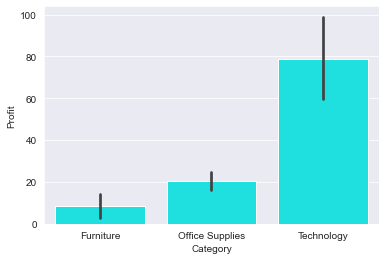

In [20]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
sns.barplot(df_cate.Category,df_num.Profit,orient='v',color='Cyan')

Though technological goods are the least purchased items out of the three, but they make the highest profit.

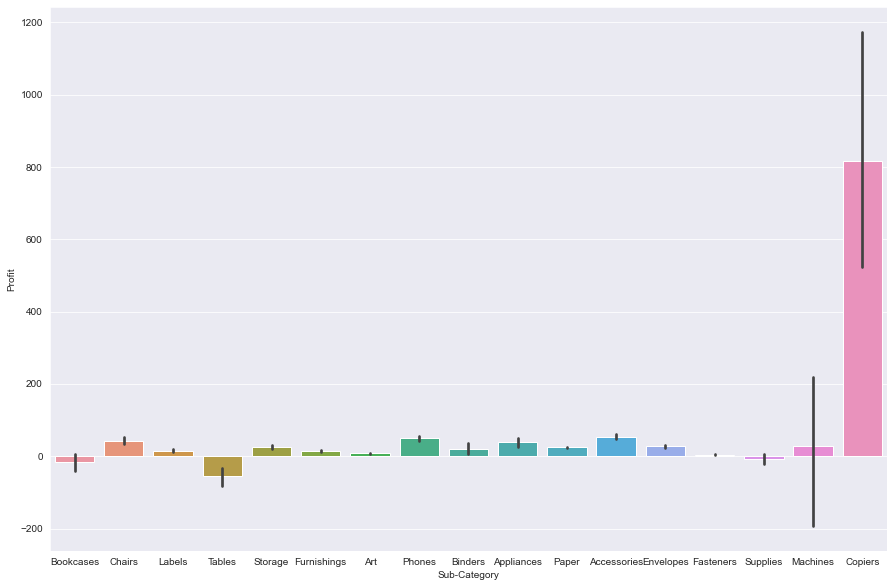

In [21]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.barplot(df_cate['Sub-Category'],df_num.Profit)

- Copiers is the highest profitting item of all. Almost everthing except Tables and Bookcases, is a profitable item.

# Conclusions
- The 'Consumers' segment though the highest purchasers, contribute the lowest in the total profit. On the other hand, 'Home Office' customers shop the least, but their share in the profits is the highest. So, the business managers should target this particular segment and formulate marketing plans to increase their participation in the business.


- Though dicounting the goods is increasing the total sales but the net profit margin is going down. Profit is exhibiting a negative linear relationship with the 'Discount' variable( a correlation of '-0.22'). So, it's better from the business perspective to keep the discount levels not more than 20%, especially for the 'Consumer' segment of the customers.


- People from the Central US are the focal point for the managers since they are contributing the least to the business sales and hence the overall profit of the store.

- 'Office Supplies' is the highest-seller of all the categories, but 'Technology' stands outs from the profit point of view. And 'Furniture' is the least profit contributor, all due to the 'Bookcases' and 'Tables' that are bringing loss to the store; so either the dicounts on them should be removed or they should be discontinued altogether.